<a href="https://colab.research.google.com/github/deepika-2411/Unsupervised-Model-Netflix-Movies-TV-shows-clustering/blob/main/Unsupervised_Netflix_Movies_TV_shows_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix-Movies/TV shows clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**Deepika Gupta
##### **Team Member 2 -**Palak Bindal

# **Project Summary -**

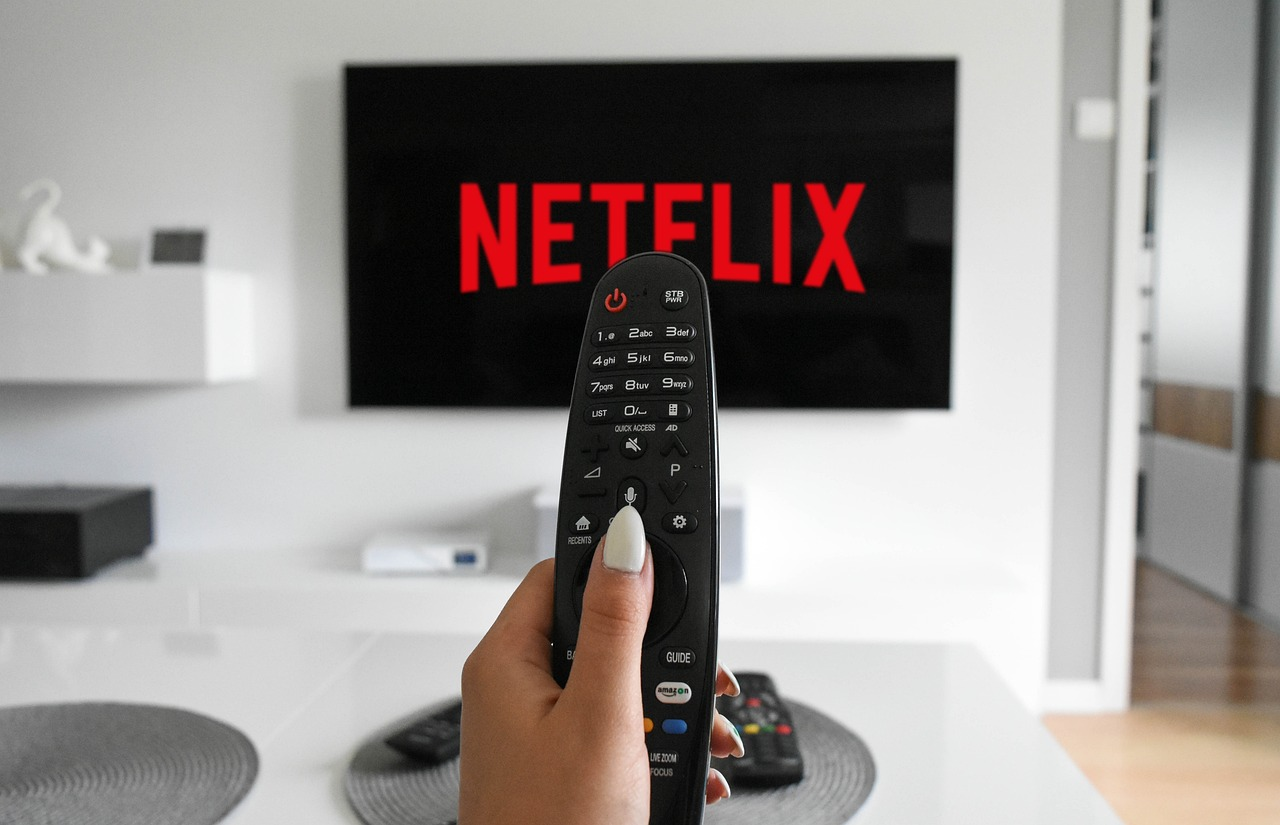

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, we worked on a text clustering problem where we had to classify/group the Netflix movie/shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

The dataset contained about 7787 records, and 11 attributes.

In the initial phase, we have focused more on the data cleaning and analyzed data in various categories and then we did exploratory data analysis (EDA).

We Created cluster using following attributes like director, cast, country, genre, rating and description. These attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

We used Principal Component Analysis (PCA) to handle the curse of dimensionality.

We built Two types of clusters using the K-Means Clustering and Agglomerative Heirachycal clustering algorithm and find out optimal number of clusters using diffrent technique such as elbow method, silhoutte score and dendogram etc.

A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.


# **GitHub Link -**

https://github.com/deepika-2411/Unsupervised-Model-Netflix-Movies-TV-shows-clustering/upload/main

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.


# **In this project, you are required to do**
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features





# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()



### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/classification Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

## 2. ***Data Wrangling***

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape


In [ ]:
df.columns


### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()].sum()

There are no duplicated values



#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
df.isnull().sum().sum()

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False,cmap="Greens")
plt.xlabel("column_name", size=14)
plt.title("missing values in column",weight="bold",size=17)
plt.show()


In [ ]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)


In [ ]:
df.shape

In [ ]:
#again checking is there any null values are not
df.isnull().sum()

We have successfully handled all the missing values in the dataset.



### What did you know about your dataset?

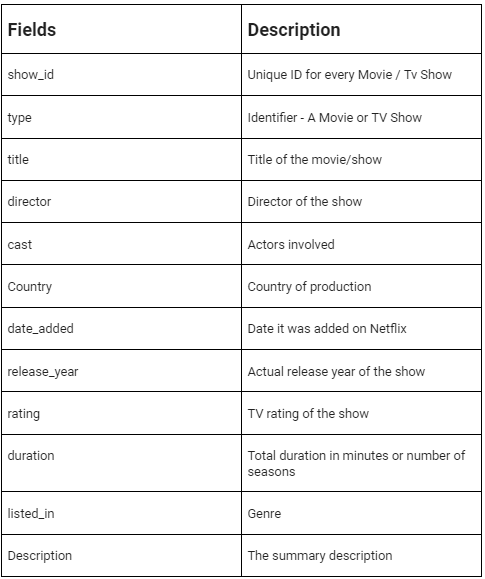

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description 

1.   11 variables are object data type
2.   one variables belongs to integer data type


### Check Unique Values for each variable.

In [ ]:
df.nunique()


In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print("No. of unique values in ",i,"is",df[i].nunique())


## ***3. Exploratory Data Analysis***


### ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***


#**Uni-Variate Analysis**

# **1.Type**



In [ ]:
# Check Unique Values for each variable.
df['type'].value_counts()

In [ ]:
#countplot to visualize the number of movies and tv_shows in type column
sns.countplot(df['type'])

 Netflix has 5372 movies and 2398 TV shows, there are more number movies on Netflix than TV shows.



# **2.ratings**



In [ ]:
df['rating'].value_counts()

In [ ]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(df['rating'])

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)
df['target_ages'].head()

In [ ]:
df['target_ages'].value_counts()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='target_ages',data=df)

Around 50% of shows on Netflix are produced for adult audience. Followed by Teens, older kids and kids. Netflix has the least number of shows that are specifically produced for kids than other age groups.



# Typecasting 'date_added' from string to datetime:


In [ ]:
df["date_added"].head()

In [ ]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])
df["date_added"].head()

In [ ]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()


The shows were added on Netflix between 1st January 2008 and 16th January 2021.



In [ ]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)
df.head()

In [ ]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')


Netflix has greater number of new movies / TV shows than the old ones.


In [ ]:
# Number of shows added on different months
plt.figure(figsize = (10,5)) 
sns.countplot(df['month_added'])
plt.title('Shows/Movies added each month over the years')
plt.xlabel('')


Over the years a greater number of shows were added in the months of October, November, December, and January.


In [ ]:
# Number of shows added over the years
plt.figure(figsize = (10,5)) 
sns.countplot(df['year_added'])
plt.title('Number of shows/movies added each year')
plt.xlabel('')



* Netflix continuous to add more shows/movies on its platform over the years.

*  There is a decrease in the number of shows/movies added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
 




*   We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.





##**Director**

In [ ]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')


Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.


##**Country and Listed in**

In [ ]:
# Top countries
df.country.value_counts()

In [ ]:
# Genre of shows
df.listed_in.value_counts()

There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.

To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.

Also, let's consider only the primary genre of the respective movie / TV show.


In [ ]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
# contry in which a movie was produced
df.country.value_counts()

In [ ]:
# genre of shows
df.listed_in.value_counts()

In [ ]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

The highest number of movies / TV shows were based out of the US, followed by India and UK.


In [ ]:
# Top 10 genres 
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')


The dramas is the most popular genre followed by comedies and documentries.


The majority of the shows on Netflix are catered to the needs of adult and teens population.


# **Bivariate analysis:**


In [ ]:
print(f"number of director who directed movie : {df[df['type']=='Movie'][~(df['director']=='Unknown')].value_counts().sum()}")
print(f"number of director who directed TV Show :{df[df['type']=='TV Show'][~(df['director']=='Unknown')].value_counts().sum()}")

In [ ]:
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5))

# top 10 director who directed TV show
show =df[df['type']=='TV Show'][~(df['director']=='Unknown')].director.value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=15)


# top 10 director who directed movie
movie =df[df['type']=='Movie'][~(df['director']=='Unknown')].director.value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=15)

plt.tight_layout()
plt.show()


Analysis from above graph.

Alastair Fothergill has directed three TV shows, the most of any director.
Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.
This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina


In [ ]:
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5))

# top 10 TV shows actor 
TV_shows = df[df['type']=='TV Show'][~(df['cast']=='Unknown')].cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[0])
TV_shows.set_title('Top 10 actors who appeared in Tv shows', size=15)

# top 10 Movie actor 
movies = df[df['type']=='Movie'][~(df['cast']=='Unknown')].cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('Top 10 actors who appeared in movie', size=15)

plt.tight_layout()
plt.show()


Analysis from above graph.

Takahiro Sakurai, Yuki Kaji and Daisuke Ono played highest role in the TV shows.
Anupam Kher, Shahrukh Khan and Om Puri played highest number of role in the movies.


# **Duration**

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(df[df['type']=='Movie']['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()


most of the movies have duration of between 50 min to 150 min



In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(15,10))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.countplot(df[df['type']=='TV Show']['duration'], order = df[df['type']=='TV Show']['duration'].value_counts().index)
plt.title('Countplot with Normal distribution for Movies',fontweight="bold")
plt.show()


highest number of tv_shows consistig of single season



## Description

In [ ]:
# text documents
from wordcloud import WordCloud, STOPWORDS
text = " ".join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()


Analysis from above graph.

Most of the comman words present in description column are family, find, life, love, new, world, friend, live.


# **Bivariate**

In [ ]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [ ]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



*   Over the years, Netflix has consistently focused on adding more shows in its platform.

*   Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.

* This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.
  



In [ ]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))


In [ ]:
# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')



*   Netflix has several movies on its site, including those that were released in way back 1942.

*  As per the plot, movies made in the 1940s had a fairly short duration on average.



*  On average, movies made in the 1960s have the longest movie length.

*  The average length of a movie has been continuously decreasing since the 2000s.
 



In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap


In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()


the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

Also, Mexico and Spain have similar content on Netflix for different age groups.



Some movies and TV shows were actually released in the past and they were added later on Netflix. But some movies and TV shows were released on Netflix itself. Named those as Netflix Originals.



In [ ]:
df['originals'] = np.where(df['release_year'] == df['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(df['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])


30% movies released on Netflix. 70% movies added on Netflix were released earlier by different mode.



## ***4. Hypothesis Testing***

In [ ]:
# Perform Statistical Test to obtain P-Value

movies=df[df['type']=='Movie']


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**HO:movies rated for kids and older kids are at least two hours long.**

**H1:movies rated for kids and older kids are not at least two hours long.**





In [ ]:
#group_by duration and TYPE                 
group_by_= df[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group


In [ ]:
#In A and B variable grouping values 
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))


In [ ]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)


In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)


Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies



# ***5.Feature engineering and Preprocessing***


In [ ]:
# creating final_text column using all text column which one is used for model building purpose.
df['final_text'] = df['description'] + ' ' + df['listed_in'] +' ' + df['rating'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['director']
df['final_text']

In [ ]:
df.final_text[0]




*   We have successfully added all the necessary data into a single column





In [ ]:
df.dtypes


In [ ]:
import string,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


#  Removing non-ASCII characters:


In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words


In [ ]:
# remove non-ascii characters
df['final_text'] = remove_non_ascii(df['final_text'])


In [ ]:
df['final_text'][0]

# Removing stopwords and lower case::


In [ ]:
# download the stop words list if it is not already downloaded
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)


In [ ]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)


In [ ]:
df['final_text']=df['final_text'].apply(stopwords)

In [ ]:
df['final_text'][0]

We have successfully removed all the stopwords and converted the corpus to lowercase.


# Removing Punctuation:
Removing punctuation is a common pre-processing step in natural language processing (NLP) tasks. Punctuation marks like periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can affect the performance of NLP models.



In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    # replacing the punctuations with no space, which deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


In [ ]:
# Removing punctuation marks
df['final_text'] = df['final_text'].apply(remove_punctuation)


In [ ]:
df['final_text'][0]

We have successfully dropped all the punctuation marks from the corpus.


# Lemmatization:



In [ ]:
import nltk
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas


In [ ]:
# Lemmatization
df['final_text'] = lemmatize_verbs(df['final_text'])


# Tokenization:


In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()


In [ ]:
df['final_text'] = df['final_text'].apply(lambda x: tokenizer.tokenize(x))


The corpus is converted to tokens.


# Text Vectorization.
   Text Vectorization is the process of converting text into numerical representation


*   We will vectorized the corpus using TFIDF vectorizer, where TFIDF stands for Term Frequency Inverse Document Frequency.
         
         TFIDF=TF*IDF




In [ ]:
# clustering tokens saved in a variable
final_data = df['final_text']
final_data

In [ ]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 10000)    
tfidf_matrix = tfidf.fit_transform(final_data)

# collect the tfid matrix in numpy array
array = tfidf_matrix.toarray()  
   

In [ ]:
print(array)
print(f'shape of the vector : {array.shape}')
print(f'datatype : {type(array)}')

# Dimensionality reduction using PCA:

*   We can use PCA (Principal component Analysis) to reduce the dimensionality of data.





In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=0)
pca.fit(array)

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')



*   We find that 100% of the variance is explained by about ~7600 components.

* Also, more than 80% of the variance is explained just by 4000 components.



*   Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance





In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=0)
pca.fit(array)


In [ ]:
# transformed features
X = pca.transform(array)

# shape of transformed vectors
X.shape

We have successfully reduced the dimensionality of data using PCA.



## ***6.ML Model Implementation***

# Clusters implementation


# K-Means Clustering


K-means clustering is an unsupervised machine learning algorithm that is used to divide a dataset into a specified number of clusters. It is called "unsupervised" because the algorithm does not use any labeled examples to learn about the data.



Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.



In [ ]:
# Elbow method to find the optimal value of k
SSE=[]
for i in range(1,15):
  # Initialize the k-means model with the current value of i
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the value of SSE
number_clusters = range(1,15)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared Euclidean distances')


The no. of clusters is 9 in elbow method.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc


In [ ]:
#Silhouette score method to find the optimal value of k

# Initialize a list to store the silhouette score for each value of k
silhouette_scr = []

for k in range(2, 15):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_

  # silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_scr.append(score)
  
# Plot the Silhouette analysis
plt.figure(figsize=(10,5))
plt.plot(range(2,15), silhouette_scr)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The highest Silhouette score is obtained for 14 clusters but cant rely as this is continuously increasing. Therefore, considering elbow method for final clustering i.e, 9 clusters.


In [ ]:
# Clustering the data into 9 clusters
kmeans = KMeans(n_clusters=9, init='k-means++', random_state=0)
kmeans.fit(X)


In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))


In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))
     

##**Building wordclouds for different clusters built:**

In [ ]:
# Word Cloud library
from wordcloud import WordCloud, STOPWORDS


In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
     

In [ ]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)


In [ ]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

In [ ]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

In [ ]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

In [ ]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

In [ ]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

In [ ]:
# Wordcloud for cluster 6
kmeans_worldcloud(6)

In [ ]:
# Wordcloud for cluster 7
kmeans_worldcloud(7)

In [ ]:
# Wordcloud for cluster 8
kmeans_worldcloud(8)

##**Hierarchical clustering:**
Building clusters using the agglomerative (hierarchical) clustering algorithm. Agglomerative hierarchical clustering is a method of clustering that is used to build a hierarchy of clusters. It is a bottom-up approach, where each sample is initially treated as a single-sample cluster and clusters are merged together as they are deemed similar.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:



In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(15,7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4.6, color='r', linestyle='--')

At a distance of 4.6 units, 9 clusters can be built using the agglomerative clustering algorithm.


In [ ]:
#Building 7 clusters using the Agglomerative clustering algorithm:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X)

In [ ]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))


Successfully built 9 clusters using the Agglomerative (hierarchical) clustering algorithm.


##*Building wordclouds for different clusters built:*



In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

In [ ]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

In [ ]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

In [ ]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

In [ ]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

In [ ]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

In [ ]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

In [ ]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

In [ ]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

In [ ]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

## Content based recommender system:
Content-based recommendation systems recommend items to a user by using the similarity of items. This recommender system recommends products or items based on their description or features. It identifies the similarity between the products based on their descriptions.

In [ ]:
# defining a new df for building a recommender system
recommender_df = df.copy()
df['final_text']

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst).replace(',',' ')

recommender_df['final_text'] = recommender_df['final_text'].apply(lambda x: convert(x))

In [ ]:
# reseting index
recommender_df.reset_index(inplace=True)

# checking reset index 
recommender_df[['show_id', 'title', 'final_text']]

In [ ]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)


In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['final_text'])


In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)


In [ ]:
cosine_similarity.shape


In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'


In [ ]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')


In [ ]:
recommend_10('3 Idiots')


In [ ]:
recommend_10('Phir Hera Pheri')


# **Conclusion**

1. In this project, we worked on a text clustering problem wherein we had to cluster the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

2. It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States.

3.  Netflix has 5372 movies and 2398 TV shows, there are more number movies on Netflix than TV shows.

4. Around 50% of shows on Netflix are produced for adult audience. Followed by Teens, older kids and kids. Netflix has the least number of shows that are specifically produced for kids than other age groups.
5. The shows were added on Netflix between 1st January 2008 and 16th January 2021.
6. Netflix has greater number of new movies / TV shows than the old ones.
7. Netflix continuous to add more shows/movies on its platform over the years.
There is a decrease in the number of shows/movies added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.

8. Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.
9. The highest number of movies / TV shows were based out of the US, followed by India and UK.
10. The dramas is the most popular genre followed by comedies and documentries.
11. The majority of the shows on Netflix are catered to the needs of adult and teens population.

12. from elbow method ,optimal of 9 clusters formed , K Means is best for identification than Hierarchical as the evaluation metrics also indicates the same.in kmean cluster 0 has the highest number of datapoints

13. A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make top 10 recommendations to the user based on the type of show they watched.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***